In [48]:
import datetime as dt

import pandas as pd

import pandas_datareader.data as web


import matplotlib.pyplot as plt
from matplotlib import style

import bs4


style.use('ggplot')



In [49]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2020,9,23)


#df = web.DataReader('TSLA','yahoo', start, end)
    #Adjusted Close accounts for stock splits

#print(df.head())
#df.to_csv('tsla.csv')
#dftsla = pd.read_csv('tsla.csv')
#dftsla.head()

Notice that in df, the datareader knew to index by the date, but now when converted to a csv file and then read by pandas into a DataFrame, we lose this indexing; this is because a csv file is just a textfile essentially, it doesn't know how to index. 

Now we can 'comment out' the entire of the previous cell because we now have a csv file stored locally, so we can can just read this.

In [50]:
df = pd.read_csv('tsla.csv', parse_dates =True, index_col=0) 
# since parse_dates=True this means pandas will try to 
# automatically detect dates and convert them into datetime objects. 

# The index_col=0 indexes the 0th column.

df.head()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


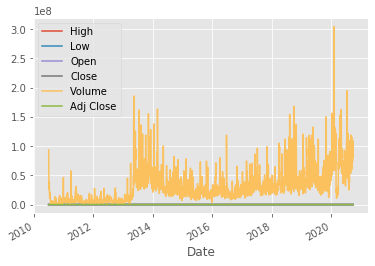

In [51]:
df.plot()
plt.show()

As you can see the only quantity you can really see on the above graph is the 'Volume' (i.e. the volume of shares traded that day), that's because the values for 'Volume' are waaay more than any other column (if you look closely you can see the other coloured lines appear at the bottom almost tracing the x-axis). So we should reference some specific columns to plot.

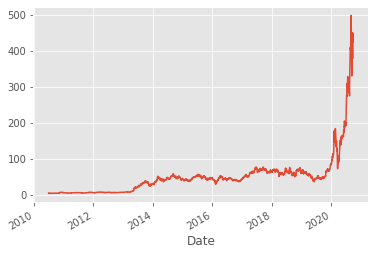

In [56]:
df['Adj Close'].plot()
plt.show()



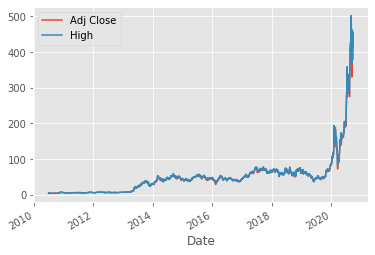

In [57]:
df[['Adj Close', 'High']].plot()
plt.show()

#Notice when referencing more than one column I have to have a double square brackets so that 
#pandas knows I want to return a DataFrame (which I then plot), this isn't necessary when quoting one column 
#as seen in the previous cell.

We create a new column on our df for the moving average with a window of 100:

In [67]:
df['100ma']=df['Adj Close'].rolling(window=100, min_periods=0).mean()

#min_periods: int, default None
#             Minimum number of observations in window required to have a value (otherwise result is NA). 
#             For a window that is specified by an offset, min_periods will default to 1. Otherwise, 
#             min_periods will default to the size of the window.
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,4.199600
2010-07-07,3.326,2.996,3.280,3.160,34608500.0,3.160,4.026333
2010-07-08,3.504,3.114,3.228,3.492,38557000.0,3.492,3.950000
2010-07-09,3.580,3.310,3.516,3.480,20253000.0,3.480,3.891250
2010-07-12,3.614,3.400,3.590,3.410,11012500.0,3.410,3.837778


Now we plot. We have a few graphs to plot, so we make one figure with subplots, these subplots are traditionally called "axes" (confusingly...), so I label the plots ax1, ax2,...etc.

The function plt.subplot2grid creates an axis at specific location inside a regular grid.

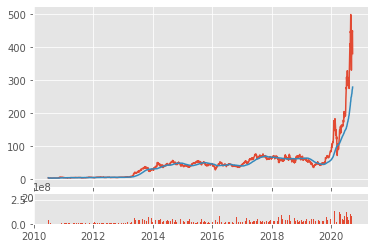

In [66]:
ax1 = plt.subplot2grid(shape=(6,1), loc=(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid(shape=(6,1), loc=(5,0), rowspan=1, colspan=1, sharex=ax1)


#Parameter descriptions: 
#----------------------------

#shape :   sequence of 2 ints
#          Shape of grid in which to place axis. First entry is number of rows, second entry is number of columns.

#loc :     sequence of 2 ints
#          Location to place axis within grid. First entry is row number, second entry is column number.

#rowspan : int
#          Number of rows for the axis to span to the right.

#colspan : int
#          Number of columns for the axis to span downwards.

#sharex=ax1 means that ax2 will have it's x-axis ALIGNED with the x-axis of ax1, it doesn't mean 
#that they actually share the same axis bad wording it seems to me. In this particular case they do 
#happen to be sharing the same x-axis, namely date.

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()